## Loading the data set

In [147]:
# Pandas is used for data manipulation
import pandas as pd

# Read in data as pandas dataframe and display first 5 rows
data = pd.read_csv('vision-complete.csv', index_col=0)
data.head(5)

,H,M,L,EMBALLAGE,EMBALLE,NU,TOTAL OPAQUE,PART OPAQUE,PAS OPAQUE,PART TRANSLUCIDE,...,SOL21,SOL22,SOL23,SOL24,SOL25,SOL26,SOL27,SOL28,SOL29,SOL30
ID,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,1,0,0,0,1,0,1,...,0.2,0.0,0.0,0.1,0.6,0.6,0.95,1.0,0.95,1.0
2,1,0,0,1,0,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.6,0.6,0.95,1.0,0.95,1.0
3,0,1,0,1,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0
4,1,0,0,1,0,0,1,0,0,0,...,0.8,0.6,0.6,0.6,0.2,0.8,0.95,1.0,0.95,1.0
5,1,0,0,0,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.10,0.8,0.60,0.8


In [148]:
print('The shape of our features is:', data.shape)
print(type(data))

The shape of our features is: (34, 71)
<class 'pandas.core.frame.DataFrame'>


## Extract the features and solutions

In [149]:
# Use numpy to convert to arrays
import numpy as np

# Extract all solutions 1 to 30
solutions_frame = data.loc[:,'SOL1':'SOL30']
solutions = np.array(solutions_frame)

# Remove the solutions from the features (axis 1 refers to the columns)
features = data.drop(solutions_frame, axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)
solution_list = list(solutions_frame.columns)

# Convert to numpy array
features = np.array(features)

print("All the feature names:")
print(feature_list)

print("All the feature values:")
print(features)

print("All the solution names:")
print(solution_list)

print("All the solutions:")
print(solutions)


All the feature names:
['H', 'M', 'L', 'EMBALLAGE', 'EMBALLE', 'NU', 'TOTAL OPAQUE', 'PART OPAQUE', 'PAS OPAQUE', 'PART TRANSLUCIDE', 'PAS TRANSLUCIDE', 'TOTAL TRANSPARENT', 'PART TRANSPARENT', 'PAS TRANSPARENT', 'REFLE OUI', 'REFLE NON', 'REFLE PART', 'LISSE', 'RUGUEUX', 'SURFACE REG', 'SURFACE IRREG', 'GEOM ALVEOLE', 'GEOM CONVEXE', 'GEOM ALEATOIRE', 'GEOM PLAT', 'PLIS', 'FLAP OUI', 'FLAP NON', 'OR', 'ARGENT', 'METALLISE', 'BLANC', 'BRUN', 'MULTICOULEUR', 'BEIGE', 'NOIR', 'ORANGE', 'ROUGE', 'JAUNE', 'VERT', 'BLEU']
All the feature values:
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
All the solution names:
['SOL1', 'SOL2', 'SOL3', 'SOL4', 'SOL5', 'SOL6', 'SOL7', 'SOL8', 'SOL9', 'SOL10', 'SOL11', 'SOL12', 'SOL13', 'SOL14', 'SOL15', 'SOL16', 'SOL17', 'SOL18', 'SOL19', 'SOL20', 'SOL21', 'SOL22', 'SOL23', 'SOL24', 'SOL25', 'SOL26', 'SOL27', 'SOL28', 'SOL29', 'SOL30']
All the solutions:
[[0.   0.   0.1  ... 1.   0.

## Training and Testing Sets

In [150]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_solutions, test_solutions = train_test_split(features, solutions, test_size = 0.25,
                                                                                  random_state = 42)

print('Training Features  Shape:', train_features.shape)
print('Training Solutions Shape:', train_solutions.shape)
print('Testing  Features  Shape:', test_features.shape)
print('Testing  Solutions Shape:', test_solutions.shape)

Training Features  Shape: (25, 41)
Training Solutions Shape: (25, 30)
Testing  Features  Shape: (9, 41)
Testing  Solutions Shape: (9, 30)


## Training the data

In [151]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)

# Train the model on training data
rf.fit(train_features, train_solutions);

## Make Predictions on Test Data

In [152]:
# import metrics
from sklearn import metrics

# Use the forest's predict method on the test data
predictions_rf = rf.predict(test_features)

# Print out the error
print('Mean Absolute Error (MAE)      :', metrics.mean_absolute_error(test_solutions, predictions_rf))
print('Mean Squared Error (MSE)       :', metrics.mean_squared_error(test_solutions, predictions_rf))
print('Root Mean Squared Error (RMSE) :', np.sqrt(metrics.mean_squared_error(test_solutions, predictions_rf)))


Mean Absolute Error (MAE)      : 0.29524313492063486
Mean Squared Error (MSE)       : 0.12523393289232435
Root Mean Squared Error (RMSE) : 0.35388406702241393


## Feature importance

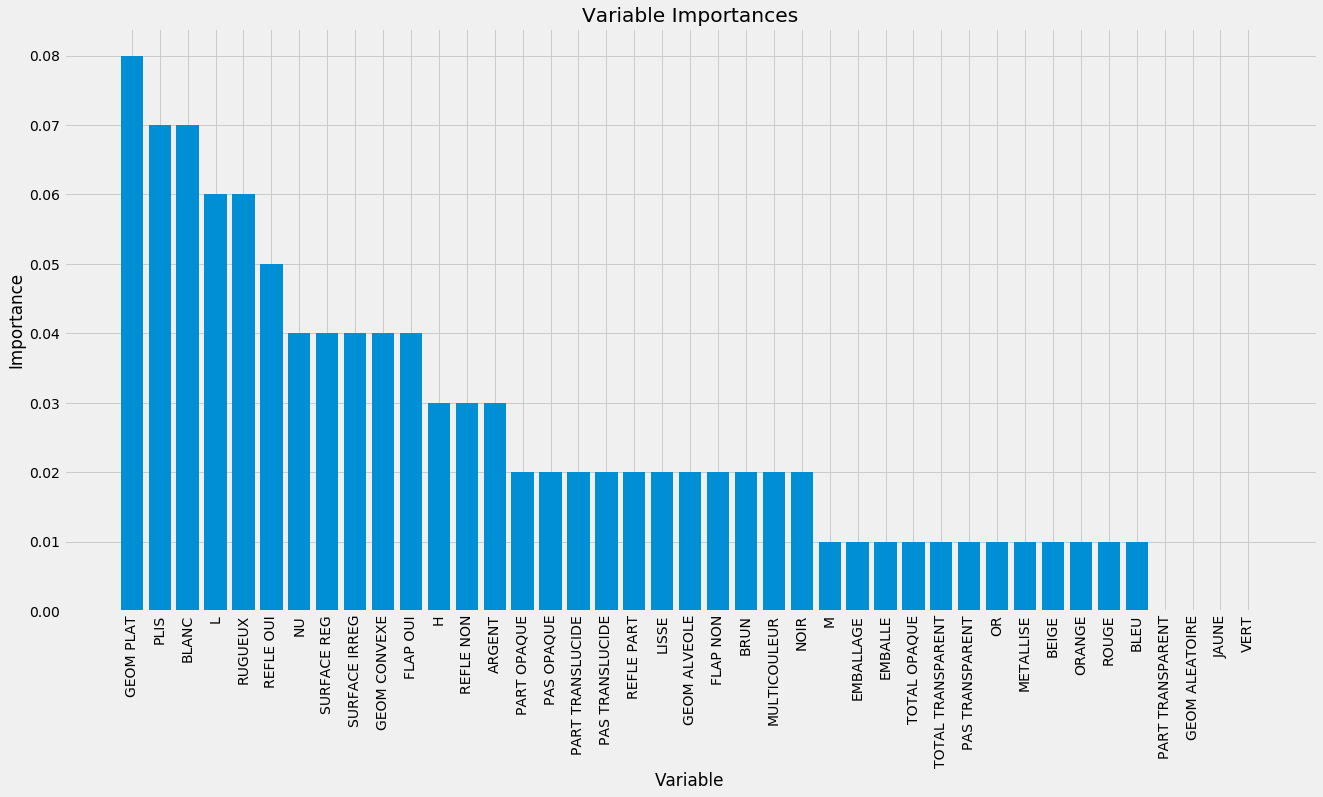

In [153]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline

# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
unzipped = list(zip(*feature_importances))

# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

# Set the style
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [20.0, 10.0]

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, list(unzipped[1]), orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, list(unzipped[0]), rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable'); 
plt.title('Variable Importances'); 

## Grid search

Explores all random forests with all parameter permutations => **216 permutations**

In [154]:
from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

# use a full grid over all parameters (216 combinations)
param_grid = {"max_depth": [3, None],
              "max_features": [3, 10, 41],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["mse", "mae"]}

# run grid search
grid_search = GridSearchCV(rf, param_grid=param_grid)
start = time()
grid_search.fit(train_features, train_solutions)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

GridSearchCV took 95.18 seconds for 216 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.085 (std: 0.112)
Parameters: {'bootstrap': False, 'criterion': 'mse', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

Model with rank: 2
Mean validation score: 0.077 (std: 0.123)
Parameters: {'bootstrap': False, 'criterion': 'mae', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 3}

Model with rank: 3
Mean validation score: 0.074 (std: 0.115)
Parameters: {'bootstrap': False, 'criterion': 'mse', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 3}



## Randomized search

Explores random forests with a random set of permutations => **?? permutations**

In [155]:
from sklearn.model_selection import RandomizedSearchCV

# specify parameters and distributions to sample from
param_dist_rf = {"max_depth": [3, None],
              "max_features": sp_randint(1, 41),
              "min_samples_split": sp_randint(2, 41),
              "min_samples_leaf": sp_randint(1, 41),
              "bootstrap": [True, False],
              "criterion": ["mse", "mae"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(rf, param_distributions=param_dist_rf,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(train_features, train_solutions)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 6.63 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: -0.071 (std: 0.157)
Parameters: {'bootstrap': True, 'criterion': 'mse', 'max_depth': 3, 'max_features': 27, 'min_samples_leaf': 1, 'min_samples_split': 10}

Model with rank: 2
Mean validation score: -0.142 (std: 0.088)
Parameters: {'bootstrap': False, 'criterion': 'mse', 'max_depth': 3, 'max_features': 27, 'min_samples_leaf': 24, 'min_samples_split': 19}

Model with rank: 2
Mean validation score: -0.142 (std: 0.088)
Parameters: {'bootstrap': False, 'criterion': 'mse', 'max_depth': 3, 'max_features': 15, 'min_samples_leaf': 36, 'min_samples_split': 37}

Model with rank: 2
Mean validation score: -0.142 (std: 0.088)
Parameters: {'bootstrap': False, 'criterion': 'mse', 'max_depth': None, 'max_features': 40, 'min_samples_leaf': 25, 'min_samples_split': 19}

Model with rank: 2
Mean validation score: -0.142 (std: 0.088)
Parameters: {'bootstrap': False, 'criterion': 'mse', 'max_

## Visualizing a Single Decision Tree

In [156]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'sample_tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('sample_tree.dot')

# Write graph to a png file
graph.write_png('sample_tree.png'); 

print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 8


![Sample tree](sample_tree.png)

In [157]:
from ipywidgets import widgets

# create form
display(widgets.HTML(
    value="<h3>Sélectionnez les qualités du produit:</h3>"
))

importance = widgets.Dropdown(
    options={'Haute': 4, 'Moyenne': 2, 'Basse': 1},
    value=4,
    description='Importance:',
    disabled=False,
)

product = widgets.Dropdown(
    options={'Emballage': 4, 'Emballé': 2, 'Nu': 1},
    value=4,
    description='Type de produit:',
    disabled=False,
)

opacity = widgets.Dropdown(
    options={'Totalement': 4, 'Partiellement': 2, 'Non': 1},
    value=4,
    description='Opacité:',
    disabled=False,
)

translucid = widgets.Dropdown(
    options={'Partiellement': 2, 'Non': 1},
    value=2,
    description='Translucidité:',
    disabled=False,
)

transparency = widgets.Dropdown(
    options={'Totalement': 4, 'Partiellement': 2, 'Non': 1},
    value=4,
    description='Transparence:',
    disabled=False,
)

reflexion = widgets.SelectMultiple(
    options={'Oui': 4, 'Non': 2, 'Partiellement': 1},
    value=[],
    description='Réflexion:',
    disabled=False,
    rows=3
)

roughness = widgets.SelectMultiple(
    options={'Lisse': 2, 'Rugueux': 1},
    value=[],
    description='Rugosité:',
    disabled=False,
    rows=2
)

surface = widgets.SelectMultiple(
    options={'Régulière': 2, 'Irrégulière': 1},
    value=[],
    description='Surface:',
    disabled=False,
    rows=2
)

geometry = widgets.SelectMultiple(
    options={'Alvéolé': 8, 'Convexe': 4, 'Aléatoire': 2, 'Plat': 1},
    value=[],
    description='Géométrie:',
    disabled=False,
    rows=4
)

folds = widgets.Dropdown(
    options={'Oui': 1, 'Non': 0},
    value=1,
    description='Plis:',
    disabled=False,
)

flaps = widgets.SelectMultiple(
    options={'Oui': 2, 'Non': 1},
    value=[],
    description='Flaps:',
    disabled=False,
    rows=2
)

color = widgets.SelectMultiple(
    options={'Argent': 4096, 'Aucune': 2048, 'Beige': 1024, 'Blanc': 512, 'Bleu': 256, 'Brun': 128, 'Jaune': 64, 'Métallisé': 32, 'Multicouleur': 16, 'Noir': 8, 'Or': 4, 'Orange': 2, 'Rouge': 1},
    value=[],
    description='Couleur:',
    disabled=False,
    rows=13
)

search = widgets.Button(
    description='Rechercher',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Rechercher',
    icon='cog'
)

# display form
display(importance)
display(product)
display(opacity)
display(translucid)
display(transparency)
display(reflexion)
display(roughness)
display(surface)
display(geometry)
display(folds)
display(flaps)
display(color)
display(search)

# figure out the best solution on submission
def submit(button):
    # create feature vector
    selected_features = []
    selected_features += list('{0:03b}'.format(importance.value))
    selected_features += list('{0:03b}'.format(product.value))
    selected_features += list('{0:03b}'.format(opacity.value))
    selected_features += list('{0:02b}'.format(translucid.value))
    selected_features += list('{0:03b}'.format(transparency.value))
    selected_features += list('{0:03b}'.format(sum(reflexion.value)))
    selected_features += list('{0:02b}'.format(sum(roughness.value)))
    selected_features += list('{0:02b}'.format(sum(surface.value)))
    selected_features += list('{0:04b}'.format(sum(geometry.value)))
    selected_features += list('{0:0b}'.format(folds.value))
    selected_features += list('{0:02b}'.format(sum(flaps.value)))
    selected_features += list('{0:013b}'.format(sum(color.value)))
    
    # instantiate model
    rf = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
    # train the model on the full data set
    rf.fit(features, solutions);
    # predict the solutions
    selected_features = np.array(selected_features).reshape(1, -1)
    solutions_pred = rf.predict(selected_features)

    # plot the solutions
    x_values = list(range(len(solution_list)))
    plt.bar(x_values, solutions_pred.reshape(-1), orientation = 'vertical')
    plt.xticks(x_values, solution_list, rotation='vertical')
    plt.ylabel('Probability'); 
    plt.xlabel('Solutions'); 
    plt.title('Predicted solutions'); 

search.on_click(submit)

HTML(value='<h3>Sélectionnez les qualités du produit:</h3>')

Dropdown(description='Importance:', options={'Haute': 4, 'Moyenne': 2, 'Basse': 1}, value=4)

Dropdown(description='Type de produit:', options={'Emballage': 4, 'Emballé': 2, 'Nu': 1}, value=4)

Dropdown(description='Opacité:', options={'Totalement': 4, 'Partiellement': 2, 'Non': 1}, value=4)

Dropdown(description='Translucidité:', options={'Partiellement': 2, 'Non': 1}, value=2)

Dropdown(description='Transparence:', options={'Totalement': 4, 'Partiellement': 2, 'Non': 1}, value=4)

SelectMultiple(description='Réflexion:', options={'Oui': 4, 'Non': 2, 'Partiellement': 1}, rows=3, value=())

SelectMultiple(description='Rugosité:', options={'Lisse': 2, 'Rugueux': 1}, rows=2, value=())

SelectMultiple(description='Surface:', options={'Régulière': 2, 'Irrégulière': 1}, rows=2, value=())

SelectMultiple(description='Géométrie:', options={'Alvéolé': 8, 'Convexe': 4, 'Aléatoire': 2, 'Plat': 1}, rows=4, value=())

Dropdown(description='Plis:', options={'Oui': 1, 'Non': 0}, value=1)

SelectMultiple(description='Flaps:', options={'Oui': 2, 'Non': 1}, rows=2, value=())

SelectMultiple(description='Couleur:', options={'Argent': 4096, 'Aucune': 2048, 'Beige': 1024, 'Blanc': 512, 'Bleu': 256, 'Brun': 128, 'Jaune': 64, 'Métallisé': 32, 'Multicouleur': 16, 'Noir': 8, 'Or': 4, 'Orange': 2, 'Rouge': 1}, rows=13, value=())

Button(description='Rechercher', icon='cog', style=ButtonStyle(), tooltip='Rechercher')